In [2]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import *
from keras import optimizers
from keras import initializers
from keras import losses

Using TensorFlow backend.


In [13]:
fname_train = './img100000_ave.csv'
fname_test = './rindex100000_ave.csv'
#fname_val = './1.5_0.015i_ave.csv'
data_train = np.loadtxt(fname_train, delimiter=',')
data_test = np.loadtxt(fname_test, delimiter=',')
#data_val = np.reshape(np.loadtxt(fname_val, delimiter=','), (1, 201))
data_valAE = np.load("sampled_div.npy").reshape((1,200))

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.0310 - val_loss: 0.0261
Epoch 2/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.0103 - val_loss: 0.0056
Epoch 3/100
80000/80000 [==============================] - 2s 20us/step - loss: 0.0044 - val_loss: 0.0024
Epoch 4/100
80000/80000 [==============================] - 1s 19us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 5/100
80000/80000 [==============================] - 2s 19us/step - loss: 0.0025 - val_loss: 0.0016
Epoch 6/100
80000/80000 [==============================] - 1s 18us/step - loss: 0.0023 - val_loss: 0.0038
Epoch 7/100
80000/80000 [==============================] - 1s 19us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 8/100
80000/80000 [==============================] - 1s 18us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/100
80000/80000 [==============================] - 1s 18us/step - loss: 0.0021 - val_loss: 0.0

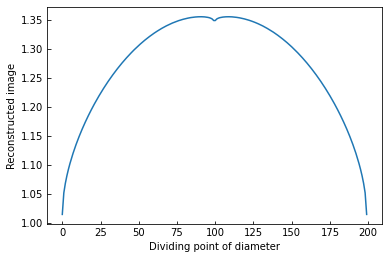

In [9]:
data_trainAE = data_train[:,:200]
data_valAE = data_val[0,:200].reshape((1,200))
modelAE = Sequential()
modelAE.add(Dense(units=50, input_shape=(200,), use_bias=True, name='hidden_layer', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=None)))
modelAE.add(Dense(units=200, use_bias=True, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0005, seed=None)))
modelAE.compile(optimizer=optimizers.Adadelta(lr=1.0), loss=losses.MeanSquaredError())
pmhAE = ParamsMeanHistory(modelAE)
logAE = modelAE.fit(x=data_trainAE, y=data_trainAE, batch_size=100, epochs=100, validation_split=0.2, shuffle=True, callbacks=[pmhAE])
predAE = modelAE.predict_on_batch(x=data_valAE)
xAE = np.arange(len(predAE.flatten()))
yAE = predAE.flatten()
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(xAE, yAE)
#plt.title("Predicted refractive index.", y=-0.2)
plt.xlabel('Dividing point of diameter')
plt.ylabel('Reconstructed image')
#plt.savefig(path+'/'+os.path.splitext(os.path.basename(fname_val))[0]+'_pred.png', bbox_inches='tight')
plt.show()

In [14]:
intermediate_modelAE = Model(inputs=modelAE.input,outputs=modelAE.get_layer('hidden_layer').output)
processed_data_train = intermediate_modelAE.predict(data_trainAE)
#ave = data_train[:,200].reshape((100000,1))
#processed_data_train = np.concatenate([processed_data_train,ave],axis=1)
processed_data_val = intermediate_modelAE.predict(data_valAE)
#ave_val = data_val[0,200].reshape((1,1))
#processed_data_val = np.concatenate([processed_data_val,ave_val],axis=1)
print(processed_data_train.shape)
print(processed_data_val.shape)

(100000, 50)
(1, 50)


In [5]:
class ParamsMeanHistory(keras.callbacks.Callback):
    def __init__(self, model):
        self.model = model
        self.paramsMeanHistory = {}
        for i in range(len(self.model.layers)):
            layer = self.model.layers[i]
            tmp = {'L'+str(i+1)+'_'+'P'+str(j+1):[] for j in range(len(layer.weights))}
            self.paramsMeanHistory.update(tmp)
    def on_epoch_end(self,epoch,logs={}):
        for i in range(len(self.model.layers)):
            params = self.model.layers[i].weights
            for j in range(len(params)):
                param = params[j].numpy()
                self.paramsMeanHistory['L'+str(i+1)+'_'+'P'+str(j+1)].append(np.sum(param)/param.size)

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 [==============================] - 2s 20us/step - loss: 0.0379 - val_loss: 0.0297
Epoch 2/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0062 - val_loss: 0.0217
Epoch 3/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0062 - val_loss: 0.0258
Epoch 4/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0061 - val_loss: 0.0161
Epoch 5/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0061 - val_loss: 0.0187
Epoch 6/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0060 - val_loss: 0.0230
Epoch 7/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0060 - val_loss: 0.0194
Epoch 8/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0060 - val_loss: 0.0182
Epoch 9/100
80000/80000 [==============================] - 1s 16us/step - loss: 0.0059 - val_loss: 0.0

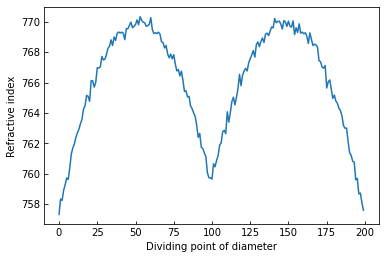

In [15]:
batch_size = 100
l1 = '1AE50_af'
h1 = 100
ad1_1 = '_randn0.005-0.0005'
ad1_2 = ''
ac1 = ''
l2 = ''
h2 = ''
ad2_1 = ''
ad2_2 = ''
ac2 = ''
op = 'adadelta'
lr = 1.0
lo = 'mse'
path = './simResults/{}{}{}{}{}-{}{}{}{}{}-{}{}-{}'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo)
os.mkdir(path)

model = Sequential()
model.add(Dense(units=h1, input_shape=(50,), use_bias=True, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=None)))
model.add(Dense(units=200, use_bias=True, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0005, seed=None)))
model.compile(optimizer=optimizers.Adadelta(lr=lr), loss=losses.MeanSquaredError())
pmh = ParamsMeanHistory(model)
log = model.fit(x=processed_data_train, y=data_test, batch_size=batch_size, epochs=100, validation_split=0.2, shuffle=True, callbacks=[pmh])
pred = model.predict_on_batch(x=processed_data_val)

x = np.arange(len(pred.flatten()))
y = pred.flatten()
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x, y)
#plt.title("Predicted refractive index.", y=-0.2)
plt.xlabel('Dividing point of diameter')
plt.ylabel('Refractive index')
plt.savefig(path+'/'+os.path.splitext(os.path.basename(fname_val))[0]+'_pred.png', bbox_inches='tight')
plt.show()

with open(path+'/Pred_{}{}{}{}{}-{}{}{}{}{}-{}{}-{}.pickle'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo), mode='wb') as f:
    pickle.dump(pred, f)
with open(path+'/Losses_{}{}{}{}{}-{}{}{}{}{}-{}{}-{}.pickle'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo), mode='wb') as f:
    pickle.dump(log, f)
with open(path+'/Params_{}{}{}{}{}-{}{}{}{}{}-{}{}-{}.pickle'.format(l1,h1,ad1_1,ad1_2,ac1,l2,h2,ad2_1,ad2_2,ac2,op,lr,lo), mode='wb') as f:
    pickle.dump(pmh, f)

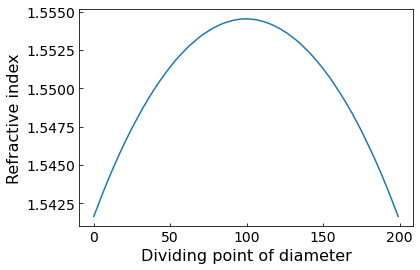

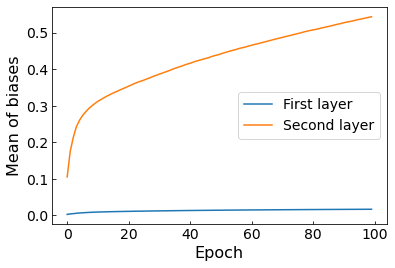

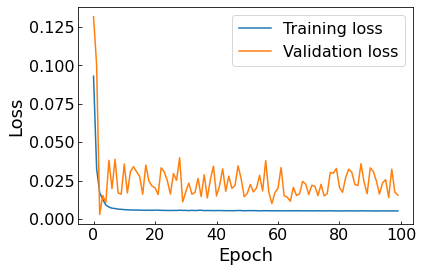

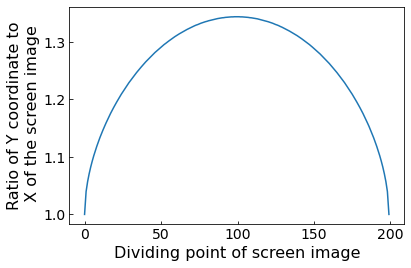

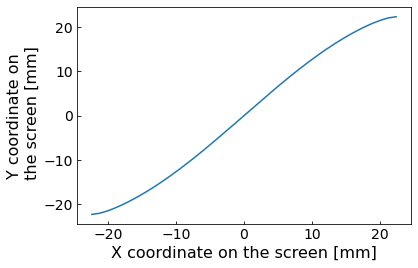

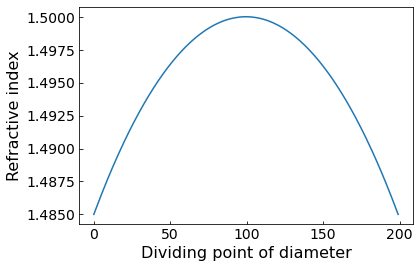

In [79]:
with open('./simResults/!!!af100_randn0.005-0.0005--adadelta1.0-mse/Pred_af100_randn0.005-0.0005--adadelta1.0-mse.pickle', 'rb') as f:
    pred = pickle.load(f).flatten()
    x = np.arange(len(pred))
    y = pred
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.plot(x, y)
    plt.xlabel('Dividing point of diameter', fontsize=16)
    plt.ylabel('Refractive index', fontsize=16)
    plt.tick_params(labelsize=14)
    #plt.savefig('pred.png', bbox_inches='tight')
    plt.show()

with open('./simResults/!!!af100_randn0.005-0.0005--adadelta1.0-mse/Params_af100_randn0.005-0.0005--adadelta1.0-mse.pickle', 'rb') as f:
    params = pickle.load(f).paramsMeanHistory
    x = np.arange(len(params['L1_P1']))
    p1_l1 = params['L1_P1']
    p2_l1 = params['L1_P2']
    p1_l2 = params['L2_P1']
    p2_l2 = params['L2_P2']
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    fig, ax = plt.subplots()
    ax.set_xlabel('Epoch',fontsize=16)
    ax.set_ylabel('Mean of biases',fontsize=16)
    #ax.plot(x,p1_l1,label='First layer')
    ax.plot(x,p2_l1,label='First layer')
    #ax.plot(x,p1_l2,label='Second layer')
    ax.plot(x,p2_l2,label='Second layer')
    ax.legend(fontsize=14)
    plt.tick_params(labelsize=14)
    #plt.savefig('paramsB.png', bbox_inches='tight')
    plt.show()

with open('./simResults/!!!af100_randn0.005-0.0005--adadelta1.0-mse/Losses_af100_randn0.005-0.0005--adadelta1.0-mse.pickle', 'rb') as f:
    losses = pickle.load(f).history
    x = np.arange(len(losses['loss']))
    loss = losses['loss']
    lossVal = losses['val_loss']
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    fig, ax = plt.subplots()
    ax.set_xlabel('Epoch',fontsize=18)
    ax.set_ylabel('Loss',fontsize=18)
    ax.plot(x,loss,label='Training loss')
    ax.plot(x,lossVal,label='Validation loss')
    ax.legend(fontsize=16)
    plt.tick_params(labelsize=16)
    plt.savefig('loss.png', bbox_inches='tight')
    plt.show()

img = np.loadtxt('1.5_0.015i.csv',delimiter=',')
x = np.arange(len(img))
y = img
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x,y)
plt.xlabel('Dividing point of screen image', fontsize=16)
plt.ylabel('Ratio of Y coordinate to\n X of the screen image', fontsize=16)
plt.tick_params(labelsize=14)
#plt.savefig('img.png', bbox_inches='tight')
plt.show()

img_nondiv = np.loadtxt('1.5_0.015i_nondiv.csv',delimiter=',')
x = img_nondiv[0]
y = img_nondiv[1]
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x,y)
plt.xlabel('X coordinate on the screen [mm]', fontsize=16)
plt.ylabel('Y coordinate on\n the screen [mm]', fontsize=16)
plt.tick_params(labelsize=14)
#plt.savefig('img_nondiv.png', bbox_inches='tight')
plt.show()

rindex = np.loadtxt('1.5_0.015r.csv',delimiter=',')
x = np.arange(len(rindex))
y = rindex
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x,y)
plt.xlabel('Dividing point of diameter', fontsize=16)
plt.ylabel('Refractive index', fontsize=16)
plt.tick_params(labelsize=14)
#plt.savefig('rindex.png', bbox_inches='tight')
plt.show()